# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [53]:
# Import your libraries:
import warnings
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

warnings.filterwarnings("ignore")


# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function.

In [7]:
# Your code here:
diabetes=load_diabetes()

Let's explore this variable by looking at the different attributes. Do this by looking at the `keys()` of this variable.

In [8]:
# Your code here:
diabetes.keys()


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

The next step is to read the description of the dataset. Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable

In [14]:
# Your code here:
diabetes['DESCR'].format()

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

What are the variables in this dataset according to the description? List them in the markdown cell below

baseline variables, age, sex, body mass index, average blood pressure, and blood serum measurements

#### Enter your answer here:




Now explore the data. Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). In the cell below find the shape of the numpy array contained in the data portion of the diabetes variable.

In [16]:
# Your code here:
diabetes['data'].shape


(442, 10)

# Challenge 2 - Perform Supervised Learning on the Dataset

#### The data has already been split to predictor and response variables. The response variable is in the `target` portion of the variable. 

Given this information, let's apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset. In the cell below, import the linear regression class from sklearn. 

In [17]:
# Your code here:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


Initialize the model in the variable `diabetes_model`

In [18]:
# Your code here:
X=diabetes['data']
y=diabetes['target']
X_train, X_test, y_train, y_test=tts(X,y, test_size=.2)
model=lr.fit(X_train,y_train)

In the cell below, fit the model and print the intercept and coefficients of the model. 

In [19]:
# Your code here:
coef=lr.coef_
inter=lr.intercept_
print(inter,coef)

151.72748302730847 [ -19.17511006 -215.07882414  516.41466576  338.36399145 -476.6248984
  286.20987429   19.42875374  115.5771822   641.7390819    71.48850349]


# Bonus Challenge 1 - Conduct a Hypothesis Test on the Model

Once we have generated a linear model, we can test each coefficient using a t-test to see whether the confidence interval for the variable contains zero. We can also perform an overall F test to check whether at least one coefficient is significantly different from zero. 

Refer to the resource in this [link](https://onlinecourses.science.psu.edu/stat501/node/297/) for more details and perform the t-tests for the model above. Additionally, interpret the results and list coefficients are significantly different from zero.


Hint: use the statsmodels package.

Your result should look similar to this:

![ols](../ols-results.png)

In [35]:
df_data=pd.DataFrame(diabetes['data'])
df_data['target']=diabetes['target']
df_data.head()

,0,1,2,3,4,5,6,7,8,9,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [45]:
df_data.columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','target']
df_data.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [47]:
# Your code here:
results = smf.ols("target ~ c0 + c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8 + c9", data = df_data).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           3.83e-62
Time:                        18:09:56   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
c0           -10.0099     59.749     -0.168      0.867    -127.446     107.426
c1          -239.8156     61.222     -3.917      0.000    -360.147    -119.484
c2           519.8459     66.533      7.813      0.000     389.076     650.616
c3           324.3846     65.422      4.958      0.000     195.799     452.970
c4          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
c5           476.7390    339.030      1.406      0.160    -189.620    1143.098
c6           101.0433    212.531      0.475      0.635    -316.684     518.770
c7           177.0632    161.476      1.097      0.273    -140.315     494.441
c8           751.2737    171.900      4.370      0.000     413.407    1089.140
c9            67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

significantly different from 0 are:
- intercept
- c1 - c3
- c8

# Challenge 2 - Peform Supervised Learning on a Pandas Dataframe

Now that we have looked at data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [24]:
# Your code here:

auto = pd.read_csv('../auto-mpg.csv')

Look at the first 5 rows using the `head()` function:

In [25]:
# Your code here:

auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [26]:
# Your code here:
auto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horse_power   392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


What is the newest model year and the oldest model year?

In [28]:
# Your code here:
print(f"max year: {auto['model_year'].max()}, min year: {auto['model_year'].min()}")


max year: 82, min year: 70


Check the dataset for missing values and remove all rows containing at least one missing value.

In [31]:
# Your code here:
auto.isna().sum()
auto_clean=auto.dropna(axis=0)
auto_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horse_power   392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   car_name      392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [32]:
# Your code here:
auto_clean['cylinders'].value_counts()


4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

In [ ]:
auto_clean.drop(columns=['car_name'], inplace=True)

In [50]:
# Import the necessary function
from sklearn.model_selection import train_test_split as tts

In [190]:
# Your code here:
X=auto_clean.drop(columns=['mpg'],inplace=False)
y=auto_clean['mpg']
X_train, X_test, y_train, y_test=tts(X,y, test_size=.2)
model=lr.fit(X_train,y_train)


Now we will the dataset that we processed and peform linear regression on this data to predict the mpg for each vehicle. Initialize the model in the cell below.

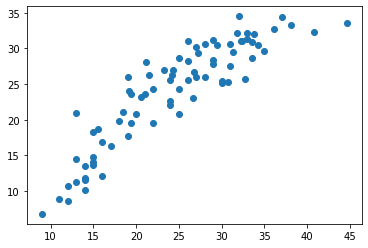

In [51]:
# Your code here:
y_pred=model.predict(X_test)
plt.scatter(y_test,y_pred)


Next, fit the model in the cell below.

In [192]:
# Your code here:



# Challenge 3 - Evaluate the Model

the r squared score of a model tells us how much variation is explained by the model. In a typical dataset, most observations differ from the mean. When we create a model, we are trying to generate an equation that will tell us by how much each observation will differ from the mean. Obviously, the vast majority of models are not perfect. They can only predict some of the variation from the mean but not all of it. We attribute the rest of the difference between the actual value and the mean to random error. We would like random error to explain the as little as possible of the variation. This is why the r squared score is an important metric.

In the next cell, compute the r squared score of the model. Do this by first computing the predicted values and assign them to `y_pred`.

In [55]:
# Import the necessary function:
# see first cell

In [56]:
# Your code here:
r2_score(y_test, y_pred)



0.8047155704604619

#### Our next step is to evaluate the model using the test data. We would like to ensure that our model is not overfitting the data. This means that our model will not be able to generalize well outside of the training data.

In the cell below, use the model to generate the predicted values for the training data and assign them to `y_test_pred`. Compute the r squared score for the test data by comparing the oberserved `y_test` data and the predicted `y_test_pred`.

In [57]:
# Your code here:
# souds a lot like a question before
y_test_pred=model.predict(X_test)

r2_score(y_test, y_test_pred)

0.8047155704604619

# Challenge 4 - Improve the Model Fit

While the most common way to improve the fit of a model is by using regularization, there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [63]:
# Your code here:
X_train09, X_test09, y_train09, y_test09=tts(X,y, test_size=.1)


Initialize a new model. Name this model `auto_model09`. Fit the model to the new sample data.

In [64]:
# Your code here:
auto_model09=lr.fit(X_train09,y_train09)


Compute the predicted values and r squared score for our new model and new sample data.

In [65]:
# Your code here:
y_pred09=auto_model09.predict(X_test09)


Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [66]:
# Your code here:
r2_score(y_test09, y_pred09)


0.8644842558265953

# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [67]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [69]:
# Your code here:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=3, step=1)


Fit the model and print the ranking

In [70]:
# Your code here:

selector = selector.fit(X, y)
selector.ranking_

array([1, 3, 2, 4, 1, 1])

Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [72]:
# Your code here:
X_red=auto_clean[['cylinders','acceleration','model_year']]
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced=tts(X_red,y, test_size=.1)

Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [73]:
# Your code here: 
auto_model_reduced=lr.fit(X_train_reduced,y_train_reduced)


In [74]:
y_pred_red=auto_model_reduced.predict(X_test_reduced)
r2_score(y_test_reduced, y_pred_red)

0.6870881895877975

In [ ]:
# no it has actually reduced the R2